In [1]:
import sys
sys.path.insert(0, "..")

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from module.base.network import Network
from module.simulation.meanfield import MeanField
import module.components.CONST as CONST

## 10 by 10 Network
We simulate current flowing through a network with two electrodes connected at the diagnoal.
The voltages are respectiveley $\pm0.1$ V.
It shows how the current is flowing from one side to the other.

In [119]:
net = Network(10,10,1,[[0,0,0],[9,9,0]])
net.set_voltage_config([0.1,-0.1], 0)
mf = MeanField(net)

In [120]:
macrostate = np.zeros(100)
dt = 0.1

In [121]:
for i in range(120):
    macrostate = macrostate + mf.calc_total_currents(macrostate) * dt

In [123]:
np.sum(mf.calc_total_currents(macrostate))

1.6344564590653476e-14

Text(0.5, 1.0, 'equilibrium state')

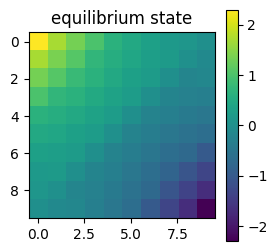

In [127]:
plt.figure(figsize=(3,3))
plt.imshow(macrostate.reshape(10,10))
plt.colorbar()
plt.title("equilibrium state")

Text(0.5, 1.0, 'current flow')

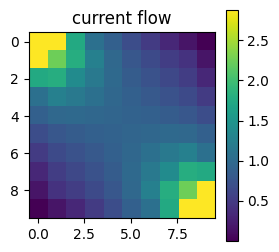

In [129]:
plt.figure(figsize = (3,3))
plt.imshow(np.sum(np.abs(mf.calc_expected_island_currents(macrostate)), axis = 1).reshape(10,10))
plt.colorbar()
plt.title("current flow")